## Feature Exploration

In this notebook, I'm going to explore the features I've calculated to determine how I should normalize my data to prepare for training.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CLEAN_DATA_PATH = "../../data/clean/"
CLEAN_DATA_FILES = os.listdir(CLEAN_DATA_PATH)

In [3]:
RAW_TRAINING_DATA_DF = pd.read_csv(os.path.join(CLEAN_DATA_PATH, "training_data.csv"))
RAW_TRAINING_DATA_DF.head(10) # to show a sample of my training data (not normalized)

,Year,TeamId,TeamName,Location,Round,RoundsCompleted,RoundsRemaining,AvgGridPosition,AvgPosition,DNFRate,AvgPointsPerRace,TotalPointFinishes,TotalPodiums,TotalPoints,hadPenaltyThisYear,FinalRank
0,2018,mercedes,Mercedes,Melbourne,1,0,20,8.000000,5.000000,0.000000,11.000000,2,1,22.0,0,1
1,2018,mercedes,Mercedes,Sakhir,2,1,19,7.000000,3.750000,0.000000,13.750000,4,3,55.0,0,1
2,2018,mercedes,Mercedes,Shanghai,3,2,18,5.833333,3.500000,0.000000,14.166667,6,4,85.0,0,1
3,2018,mercedes,Mercedes,Baku,4,3,17,5.000000,4.500000,0.125000,13.750000,7,5,110.0,0,1
4,2018,mercedes,Mercedes,Barcelona,5,4,16,4.300000,3.900000,0.100000,15.300000,9,7,153.0,0,1
5,2018,mercedes,Mercedes,Monte Carlo,6,5,15,4.250000,3.916667,0.083333,14.833333,11,8,178.0,0,1
6,2018,mercedes,Mercedes,Montréal,7,6,14,4.071429,3.857143,0.071429,14.714286,13,9,206.0,0,1
7,2018,mercedes,Mercedes,Le Castellet,8,7,13,3.750000,3.875000,0.062500,14.812500,15,10,237.0,0,1
8,2018,mercedes,Mercedes,Spielberg,9,8,12,3.500000,5.388889,0.166667,13.166667,15,10,237.0,0,1
9,2018,mercedes,Mercedes,Silverstone,10,9,11,3.400000,5.150000,0.150000,13.350000,17,11,267.0,0,1


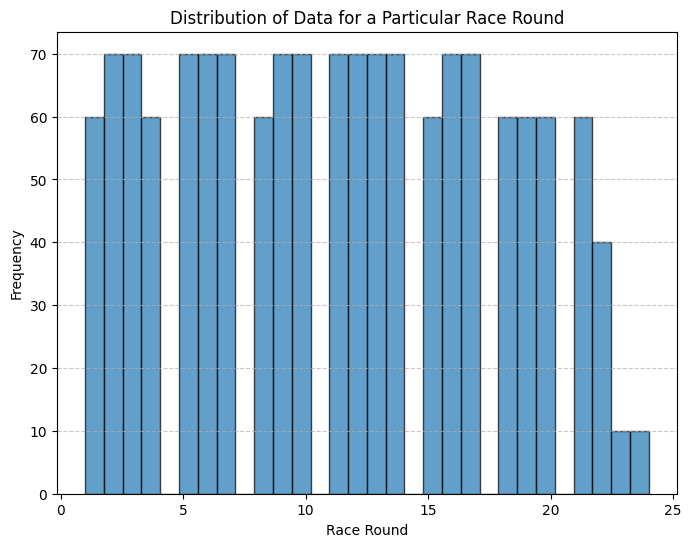

In [4]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['Round'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Data for a Particular Race Round')
plt.xlabel('Race Round')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

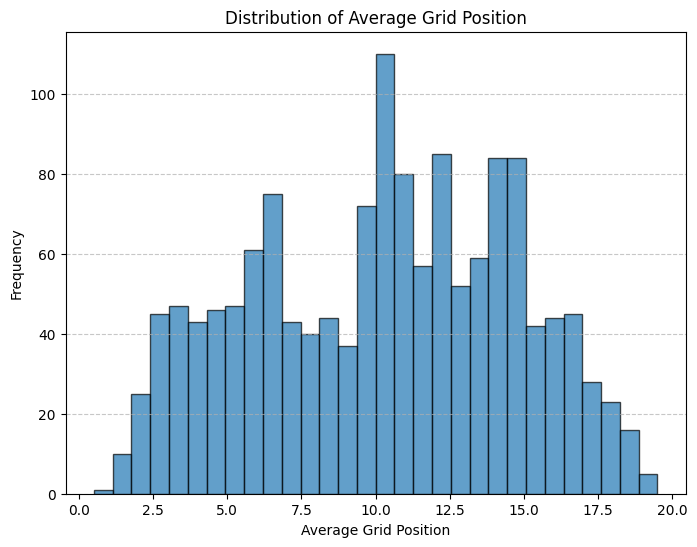

In [5]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['AvgGridPosition'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Grid Position')
plt.xlabel('Average Grid Position')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

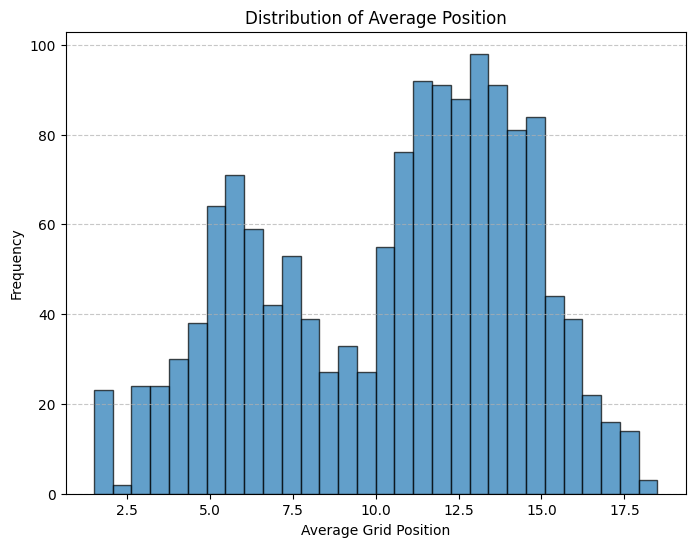

In [6]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['AvgPosition'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Position')
plt.xlabel('Average Grid Position')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

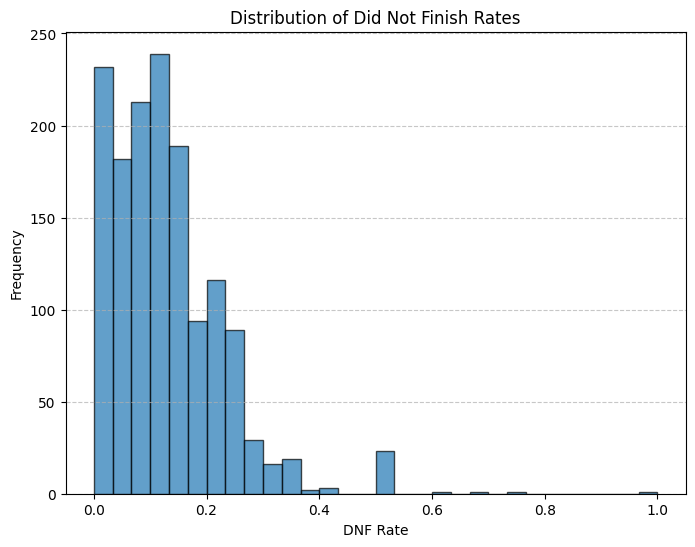

In [7]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['DNFRate'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Did Not Finish Rates')
plt.xlabel('DNF Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

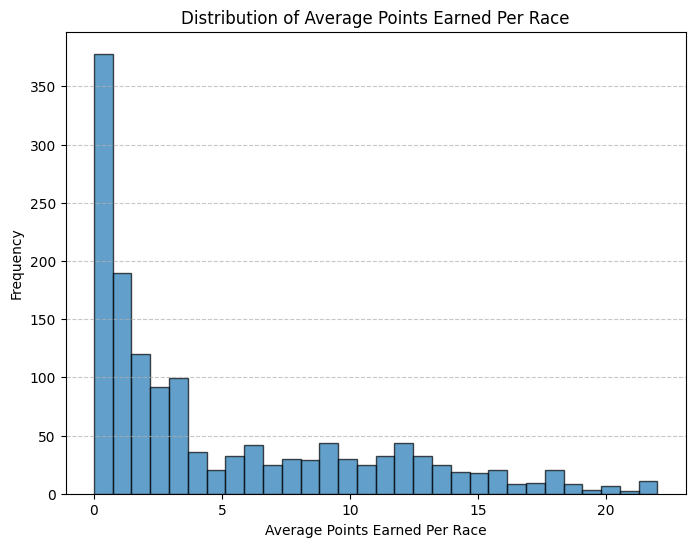

In [8]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['AvgPointsPerRace'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Points Earned Per Race')
plt.xlabel('Average Points Earned Per Race')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

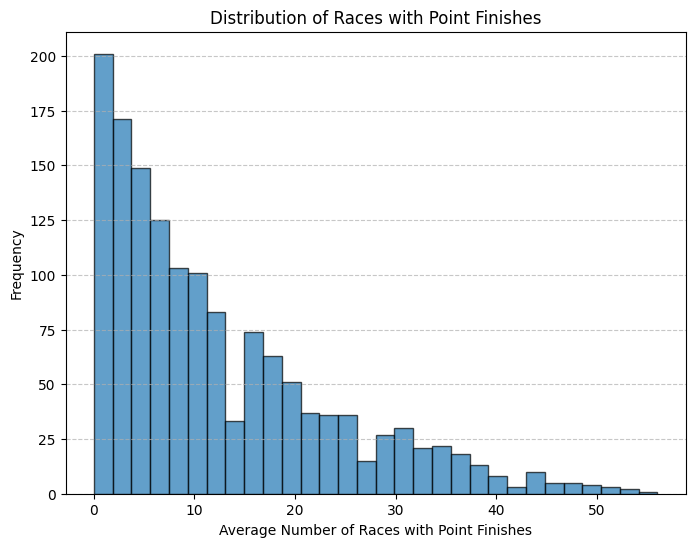

In [9]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['TotalPointFinishes'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Races with Point Finishes')
plt.xlabel('Average Number of Races with Point Finishes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

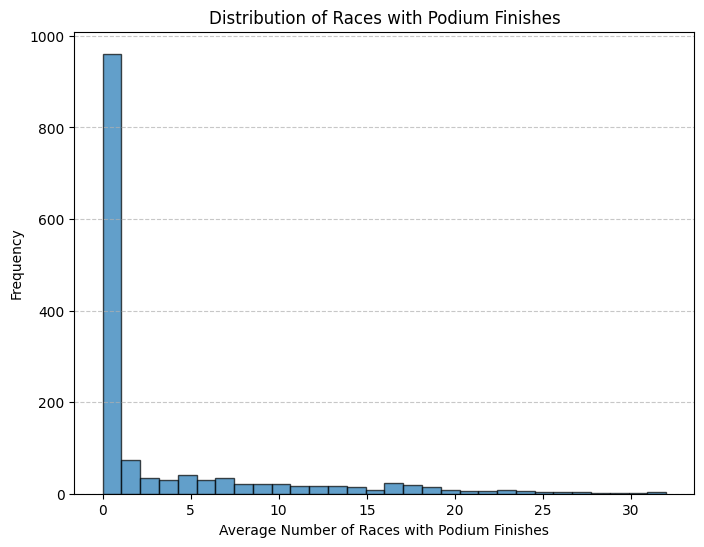

In [10]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['TotalPodiums'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Races with Podium Finishes')
plt.xlabel('Average Number of Races with Podium Finishes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

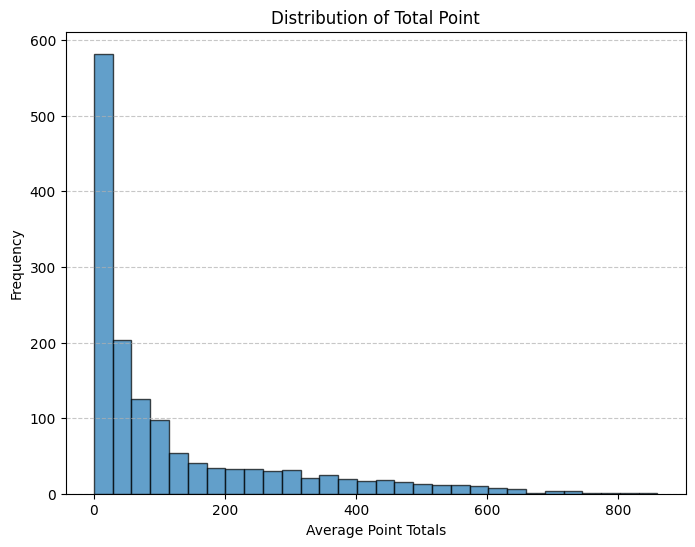

In [11]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['TotalPoints'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Point')
plt.xlabel('Average Point Totals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

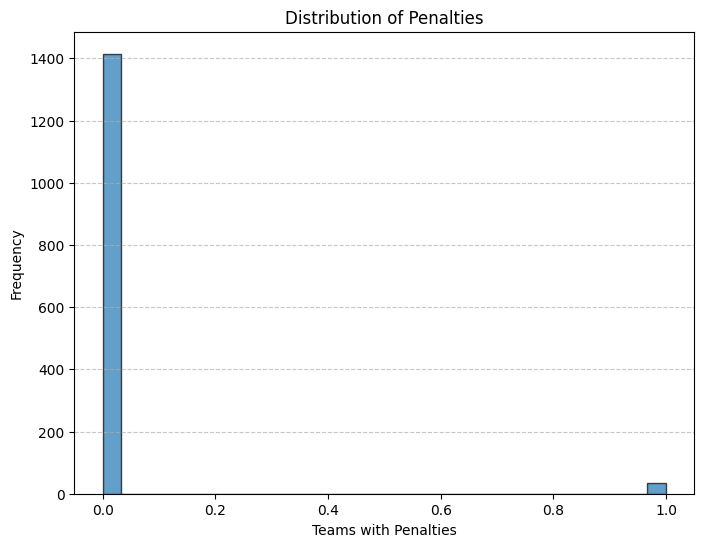

In [12]:
plt.figure(figsize=(8, 6))
RAW_TRAINING_DATA_DF['hadPenaltyThisYear'].plot.hist(bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Penalties')
plt.xlabel('Teams with Penalties')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analysis

Based on the histograms, many of the data features I've decided to use and calculate have highly-skewed and bimodal shapes. After doing some quick research, I discovered using some form of logarithmic transformation could help "normalize" these features.